Исследуем набор [данных](https://disk.yandex.ru/d/DqsoMAMSlyd2hQ) о видеоиграх, объем продаж которых составил более 100 000 копий.  

### Задача

1. Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.  
2. Построить график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.  
3. На каких платформах произошло больше всего релизов?  
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?  
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other).  
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.  
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?  

### Описание данных  

Имеются следующие поля:  

- **Rank** – место по объему продаж  
- **Name** – название игры  
- **Platform** – платформа, на которой выпущена игра  
- **Year** – год релиза  
- **Genre** – жанр  
- **Publisher** – издатель  
- **NA_Sales** – продажи в Северной Америке, в млн.  
- **EU_Sales** – продажи в Европе, в млн.  
- **JP_Sales** – продажи в Японии, в млн.  
- **Other_Sales** – продажи в остальном мире, в млн.  
- **Global_Sales** – продажи по всему миру, в млн.  

In [45]:
import pandas as pd
import seaborn as sns

url = 'https://stepik.org/media/attachments/lesson/383837/games.csv'
df = pd.read_csv(url,index_col='Rank')

In [46]:
df

Name Platform    Year  \
Rank                                                                       
1                                            Wii Sports      Wii  2006.0   
2                                     Super Mario Bros.      NES  1985.0   
3                                        Mario Kart Wii      Wii  2008.0   
4                                     Wii Sports Resort      Wii  2009.0   
5                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16596                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16597                     Men in Black II: Alien Escape       GC  2003.0   
16598  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16599                                        Know How 2       DS  2010.0   
16600                                  Spirits & Spells      GBA  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                                                         
1            Sports    Nintendo     41.49     29.02      3.77         8.46   
2          Platform    Nintendo     29.08      3.58      6.81         0.77   
3            Racing    Nintendo     15.85     12.88      3.79         3.31   
4            Sports    Nintendo     15.75     11.01      3.28         2.96   
5      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16596      Platform       Kemco      0.01      0.00      0.00         0.00   
16597       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16598        Racing  Activision      0.00      0.00      0.00         0.00   
16599        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16600      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
Rank                 
1             82.74  
2             40.24  
3             35.82  
4             33.00  
5             31.37  
...             ...  
16596          0.01  
16597          0.01  
16598          0.01  
16599          0.01  
16600          0.01  

[16598 rows x 10 columns]

In [5]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:

В каком столбце встретилось больше всего пропущенных значений?

In [29]:
s = df.isna().sum()
s.loc[s!=0]


Year         271
Publisher     58
dtype: int64

Удалите строки с пропущенными значениями из датасета.

In [48]:
new_df=df.dropna()

In [49]:
new_df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

3.)Выведите описательные характеристики переменной
Year и постройте график распределения количества выпущенных игр по годам. Выберите верные утверждения:

In [35]:
df.head()

Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

In [40]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [50]:
new_df.Year = new_df.Year.astype('int')

C:\Users\serge\AppData\Local\Temp\ipykernel_18692\1328038699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Year = new_df.Year.astype('int')


In [52]:
new_df

Name Platform  Year  \
Rank                                                                     
1                                            Wii Sports      Wii  2006   
2                                     Super Mario Bros.      NES  1985   
3                                        Mario Kart Wii      Wii  2008   
4                                     Wii Sports Resort      Wii  2009   
5                              Pokemon Red/Pokemon Blue       GB  1996   
...                                                 ...      ...   ...   
16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16597                     Men in Black II: Alien Escape       GC  2003   
16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16599                                        Know How 2       DS  2010   
16600                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                                                         
1            Sports    Nintendo     41.49     29.02      3.77         8.46   
2          Platform    Nintendo     29.08      3.58      6.81         0.77   
3            Racing    Nintendo     15.85     12.88      3.79         3.31   
4            Sports    Nintendo     15.75     11.01      3.28         2.96   
5      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16596      Platform       Kemco      0.01      0.00      0.00         0.00   
16597       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16598        Racing  Activision      0.00      0.00      0.00         0.00   
16599        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16600      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
Rank                 
1             82.74  
2             40.24  
3             35.82  
4             33.00  
5             31.37  
...             ...  
16596          0.01  
16597          0.01  
16598          0.01  
16599          0.01  
16600          0.01  

[16291 rows x 10 columns]

In [54]:
new_df.groupby('Year',as_index=False).agg({"Name":"count"})

Year  Name
0   1980     9
1   1981    46
2   1982    36
3   1983    17
4   1984    14
5   1985    14
6   1986    21
7   1987    16
8   1988    15
9   1989    17
10  1990    16
11  1991    41
12  1992    43
13  1993    60
14  1994   121
15  1995   219
16  1996   263
17  1997   289
18  1998   379
19  1999   338
20  2000   349
21  2001   482
22  2002   829
23  2003   775
24  2004   744
25  2005   936
26  2006  1008
27  2007  1201
28  2008  1428
29  2009  1431
30  2010  1257
31  2011  1136
32  2012   655
33  2013   546
34  2014   580
35  2015   614
36  2016   342
37  2017     3
38  2020     1

C:\Users\serge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

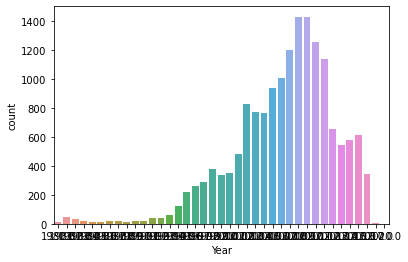

In [59]:
sns.countplot(df.Year)

In [61]:
from scipy import stats

In [66]:
stats.mode(new_df.Year)

ModeResult(mode=array([2009]), count=array([1431]))

In [ ]:
На каких платформах произошло больше всего релизов?
Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%.
Значения укажите в порядке убывания через запятую с пробелом

In [79]:
ss=new_df.groupby('Platform',as_index=False).agg({'Name':'count'})

In [81]:
ss

Platform  Name
0      2600   116
1       3DO     3
2       3DS   499
3        DC    52
4        DS  2131
5        GB    97
6       GBA   786
7        GC   542
8       GEN    27
9        GG     1
10      N64   316
11      NES    98
12       NG    12
13       PC   938
14     PCFX     1
15       PS  1189
16      PS2  2127
17      PS3  1304
18      PS4   336
19      PSP  1197
20      PSV   410
21      SAT   173
22      SCD     6
23     SNES   239
24     TG16     2
25       WS     6
26      Wii  1290
27     WiiU   143
28     X360  1234
29       XB   803
30     XOne   213

In [86]:
ss['Percent']=ss['Name']/ss.Name.sum()*100

In [87]:
ss

Platform  Name    Percent
0      2600   116   0.712050
1       3DO     3   0.018415
2       3DS   499   3.063041
3        DC    52   0.319195
4        DS  2131  13.080842
5        GB    97   0.595421
6       GBA   786   4.824750
7        GC   542   3.326990
8       GEN    27   0.165736
9        GG     1   0.006138
10      N64   316   1.939721
11      NES    98   0.601559
12       NG    12   0.073660
13       PC   938   5.757780
14     PCFX     1   0.006138
15       PS  1189   7.298508
16      PS2  2127  13.056289
17      PS3  1304   8.004420
18      PS4   336   2.062488
19      PSP  1197   7.347615
20      PSV   410   2.516727
21      SAT   173   1.061936
22      SCD     6   0.036830
23     SNES   239   1.467068
24     TG16     2   0.012277
25       WS     6   0.036830
26      Wii  1290   7.918483
27     WiiU   143   0.877785
28     X360  1234   7.574735
29       XB   803   4.929102
30     XOne   213   1.307470

In [90]:
ss.loc[ss['Percent']>7]

Platform  Name    Percent
4        DS  2131  13.080842
15       PS  1189   7.298508
16      PS2  2127  13.056289
17      PS3  1304   8.004420
19      PSP  1197   7.347615
26      Wii  1290   7.918483
28     X360  1234   7.574735

5.Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [91]:
new_df.head()

Name Platform  Year         Genre Publisher  \
Rank                                                                    
1                   Wii Sports      Wii  2006        Sports  Nintendo   
2            Super Mario Bros.      NES  1985      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

In [93]:
new_df.Publisher.value_counts().head(1)

Electronic Arts    1339
Name: Publisher, dtype: int64

Сфокусируемся на играх от Nintendo.
Посчитайте среднее, медиану
и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).
В каком регионе медианное значение объема продаж является наибольшим?

In [95]:
new_df.query('Publisher=="Nintendo"').mean()

C:\Users\serge\AppData\Local\Temp\ipykernel_18692\797721772.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.query('Publisher=="Nintendo"').mean()


Year            2003.830460
NA_Sales           1.172055
EU_Sales           0.601006
JP_Sales           0.653721
Other_Sales        0.136767
Global_Sales       2.563836
dtype: float64

In [97]:
new_df.query('Publisher=="Nintendo"').median()

C:\Users\serge\AppData\Local\Temp\ipykernel_18692\1465852916.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.query('Publisher=="Nintendo"').median()


Year            2005.000
NA_Sales           0.375
EU_Sales           0.120
JP_Sales           0.280
Other_Sales        0.030
Global_Sales       0.920
dtype: float64

In [99]:
new_df.query('Publisher=="Nintendo"').std()

C:\Users\serge\AppData\Local\Temp\ipykernel_18692\1658436258.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.query('Publisher=="Nintendo"').std()


Year            7.776370
NA_Sales        2.989913
EU_Sales        1.743953
JP_Sales        1.063110
Other_Sales     0.464170
Global_Sales    5.676925
dtype: float64

In [ ]:
7)
Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:
по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales) Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?
Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

Где на этом графике межквартильный размах?
Это длина боксплота. Чем боксплот длиннее - там больше размах

Где на этом графике медиана?
Это черта внутри боксплота, делящая его тело на две части

In [100]:
new_df.head()

Name Platform  Year         Genre Publisher  \
Rank                                                                    
1                   Wii Sports      Wii  2006        Sports  Nintendo   
2            Super Mario Bros.      NES  1985      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
dff=new_df.query('Publisher=="Nintendo"')
sns.boxplot(x='Genre',y='JP_Sales', data=dff)

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

In [110]:
dff

Name Platform  Year  \
Rank                                                                      
1                                             Wii Sports      Wii  2006   
2                                      Super Mario Bros.      NES  1985   
3                                         Mario Kart Wii      Wii  2008   
4                                      Wii Sports Resort      Wii  2009   
5                               Pokemon Red/Pokemon Blue       GB  1996   
...                                                  ...      ...   ...   
16272                           Slide Adventure: Mag Kid       DS  2007   
16360               Mario vs. Donkey Kong: Tipping Stars     WiiU  2015   
16459                           Art Academy: Home Studio     WiiU  2015   
16476                                    Captain Rainbow      Wii  2008   
16545  Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS  2015   

              Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                                                       
1            Sports  Nintendo     41.49     29.02      3.77         8.46   
2          Platform  Nintendo     29.08      3.58      6.81         0.77   
3            Racing  Nintendo     15.85     12.88      3.79         3.31   
4            Sports  Nintendo     15.75     11.01      3.28         2.96   
5      Role-Playing  Nintendo     11.27      8.89     10.22         1.00   
...             ...       ...       ...       ...       ...          ...   
16272        Action  Nintendo      0.00      0.00      0.01         0.00   
16360        Puzzle  Nintendo      0.00      0.00      0.01         0.00   
16459          Misc  Nintendo      0.00      0.00      0.01         0.00   
16476     Adventure  Nintendo      0.00      0.00      0.01         0.00   
16545          Misc  Nintendo      0.00      0.00      0.01         0.00   

       Global_Sales  
Rank                 
1             82.74  
2             40.24  
3             35.82  
4             33.00  
5             31.37  
...             ...  
16272          0.01  
16360          0.01  
16459          0.01  
16476          0.01  
16545          0.01  

[696 rows x 10 columns]

8. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.
На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [132]:

dg = new_df.query('Genre in("Fighting", "Simulation", "Platform", "Racing", "Sports")')


In [140]:
all=dg[['Name','Genre','Year','Global_Sales']]

In [150]:
dg_sum = all.groupby(['Genre', 'Year']).sum().reset_index()

In [151]:
dg_sum

Genre  Year  Global_Sales
0    Fighting  1980          0.77
1    Fighting  1985          1.05
2    Fighting  1987          5.42
3    Fighting  1991          0.39
4    Fighting  1992         15.25
..        ...   ...           ...
160    Sports  2012         30.93
161    Sports  2013         41.55
162    Sports  2014         46.66
163    Sports  2015         41.54
164    Sports  2016         14.60

[165 rows x 3 columns]

In [152]:
plt.figure(figsize=(16,16))
sns.lineplot(data=dg_sum, x='Year', y='Global_Sales',hue='Genre')

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>